# Number of ratings for each user

### Importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
df= pd.read_parquet('data/ratings.gzip')
ar=df.to_numpy()
df.head()

,userId,movieId,itemId
0,1,0132793040,5.0
1,1,B005UEB5TQ,5.0
2,2,0321732944,5.0
3,2,B000W3LJ6Y,5.0
4,2,B001EYU79A,5.0


I count the number of ratings for each user and i put there results in dictionary

In [3]:
d={}
t=len(ar)
for i in range(t):
    if ar[i,0] in d :
        d[ar[i,0]]+=1
    else :
        d[ar[i,0]]=1

I save there results because i will need them later

In [5]:
ID=list(d.keys())
NB=list(d.values())
dfDico = pd.DataFrame({'userId' : ID, 'NBRating' : NB})
dfDico.to_csv('data/user-nbRating.csv',index =False)
del ID,NB,dfDico

In [ ]:
dfDico=pd.read_csv('data/user-nbRating.csv')
d={}
for index, row in dfDico.iterrows():
    d[row['userId']]=row['NBRating']
del dfDico

I count how many user had vot x time

In [6]:
d2={}
for key, val in d.items():
    if val in d2 :
        d2[val]+=1
    else :
        d2[val]=1

In [7]:
nbRatings=list(d2.keys())
nbUsers=list(d2.values())
dfDico = pd.DataFrame({'nbRatings' : nbRatings, 'nbUsers' : nbUsers})
dfDico.to_csv('data/User_Rating.csv',index =False)

this fuction is made to create a dictionary whith the number of user in each interval

By interval I mean People who are voting between a times and b times

the values in the dictionary are a tuple whith the interval ("a-b") and the number of user

In [8]:
def dicoInterval(d2,size):
    l=list(d2.keys())
    mini=min(l)
    maxi=max(l)
    cpt=0
    d3={}
    while(cpt*size<=maxi):
        d3[cpt]=(str(cpt*size)+"-"+str(cpt*size-1+size),0)
        cpt+=1
        
    
    for key, val in d2.items():
        ind=key//size
        (a,b)=d3[ind]
        b+=val
        d3[ind]=(a,b)
    return d3

In [9]:
d3=dicoInterval(d2,10)

This algorithm create a last interval like ">500"

In [10]:
def dicoIntervalEnd(d,sup,size):
    d2={}
    maxi=sup//size
    for key, val in d.items():
        if(key<maxi):
            d2[key]=val
        elif maxi in d2 :
            (a,b)=d2[maxi]
            (c,d)=val
            b+=d
            d2[maxi]=(a,b)
        else :
            d2[maxi]=(">"+str(sup),int(0))
            
    return d2

In [11]:
d3=dicoIntervalEnd(d3,500,10)

### plot the chart

In [12]:
NBRating=list()
NBUser=list()
listTemp=list(d3.values())
for tp in listTemp:
    (A,B)=tp
    NBRating.append(A)
    NBUser.append(B)

No handles with labels found to put in legend.


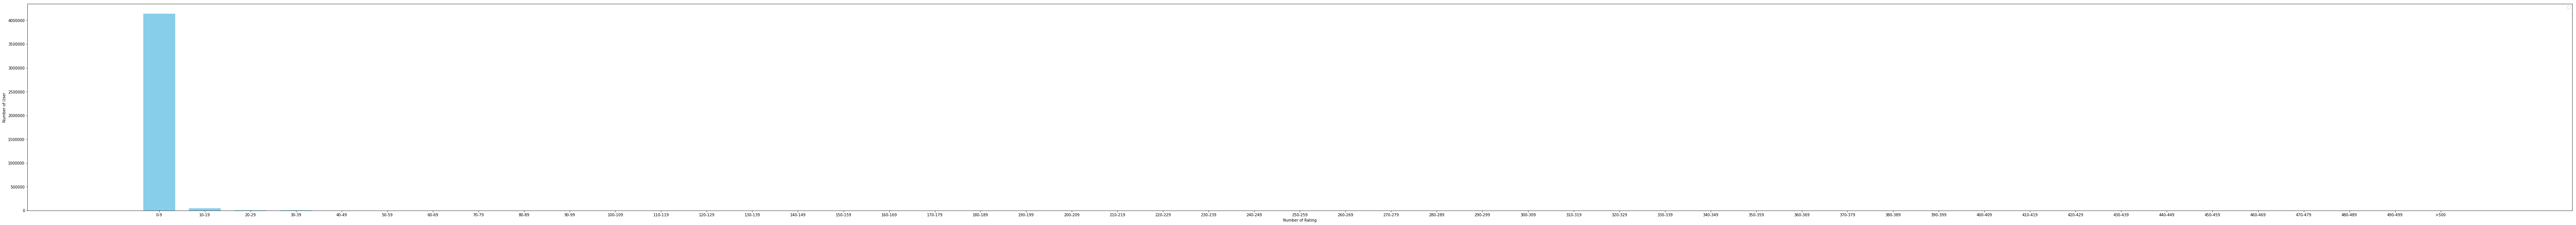

In [13]:
ind = np.arange(len(NBRating)) 
width = 0.7

fig, ax = plt.subplots(figsize = (120,10))
ax.bar(ind,NBUser,width,color='SkyBlue')
ax.set_ylabel('Number of User')
ax.set_xlabel('Number of Rating')
ax.set_xticks(ind)
ax.set_xticklabels(NBRating)
ax.legend()  

#### save the figure

In [14]:
fig.savefig('fig/Repartion.png')

In [15]:
dfRepartition = pd.DataFrame({'NBRating' : NBRating, 'NBUser' : NBUser})
dfRepartition.to_csv('data/repartition.csv',index =False,sep='\t')